In [1]:
from IPython.display import HTML
from IPython.display import Image

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

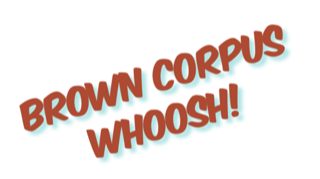

In [3]:
Image("brown_corpus_whoosh.png", width=300, height=300)

In [4]:
#   NOTE: Run blocks below top to bottom, then toggle the button above

In [5]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import csv
from ast import literal_eval
from ipywidgets import widgets, interact
from ipywidgets import IntSlider, Output
from IPython.display import clear_output

from whoosh import fields, index
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from whoosh.analysis import StemmingAnalyzer
from whoosh import qparser
from whoosh.qparser import QueryParser
from whoosh.filedb.filestore import FileStorage

In [6]:
# manage index for use later
storage = FileStorage("index")

# Create an index
#ix = storage.create_index(myschema)

# Open an existing index
storage.open_index();

In [7]:
# run search
# Good explanation on the BM25F: https://www.quora.com/How-does-BM25-work
ix = index.open_dir('index')
qp = qparser.QueryParser("sentence", ix.schema)

def search_res(x):
    ix = index.open_dir('index')
    qp = qparser.QueryParser("sentence", ix.schema)
    q = qp.parse(x)
    with ix.searcher() as s:
        results = list(s.search(q))
        for hit in results:
            print('Score: {}'.format(round(hit.score,2))) # Default score uses the BM25F Algo https://whoosh.readthedocs.io/en/latest/searching.html?highlight=default%20score#scoring
            print('b100 index:', hit['b100'])
            print('fileid: ', hit['file'])
            print(hit['category'])
            print(hit['sentence'])
            print('')
            print('')
            print('_____________________________________________________________________________________________________')

In [8]:
interact(search_res, x='');

interactive(children=(Text(value='', description='x'), Output()), _dom_classes=('widget-interact',))